In [82]:


# %pip install tabula-py
# %pip install PyPDF2
from tabula import read_pdf as reader
import tabula
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import PyPDF2
import pdfplumber

In [ ]:
# pdfplumber is far better than tabulapy

In [351]:

def getname():
    year=input("Enter the year of the entrance(2016-2023)")
    filename=f'.\PDFs\CBT{year}.pdf'
    return filename

def customint(value):
    if type(value)== str:
        pattern1= r"\d+" 
        match=re.findall(pattern1,value)
        value=''.join(match)
        # pattern2=r"5 6 4"
        # value=re.sub(pattern2,"564",value)
        return int(value)
    else:
        return int(value)

def getpage_count(filename):
    try:
        # 'r' read as text and 'rb' read as binary
        with open(filename, 'rb') as file:
            reader=PyPDF2.PdfReader(file)
            # look out for chatgpt3 result library is updatd
            pagenumber=len(reader.pages)
            return pagenumber
    except FileNotFoundError:
        return "File Not Found"
    except Exception as e:
        return f'Error: f{e} has occured'


def tabulaload(filename,pageno):
    df=pd.DataFrame()
    pageo=int(pageno)
    for page in range(1,pageno):
        df1=tabula.read_pdf(filename,pages=page)
        df1=df1[0]
        # keeps value of column label in -1 index row
        df1.loc[df.index.max()+1]=df1.columns
        lastrow=df1.iloc[-1:]
        df1=df1.iloc[:-1]
        df1=pd.concat([lastrow,df1])
        df1=df1.reset_index(drop=True)
        df1.columns=["KUCAT ID","Name","CBT Score","Applied Program"]
        # type conversion to the int for comparsion
        df1=df1.dropna()
         # we used concat instead of append due error throw
        df=pd.concat([df,df1],ignore_index=True)
    return df

def load(filename):
    df=pd.DataFrame()
    with pdfplumber.open(filename) as pdf:
        for page in pdf.pages:
            table=page.extract_table()
            df1=pd.DataFrame(table)
             # type conversion to the int for comparsion
            df1=df1.dropna()
            # we used concat instead of append due error throw
            df=pd.concat([df,df1],ignore_index=True)
        return df
     
# load(getfile())

# 

In [318]:
# Modified tabula function for 2022 data pdf
def tabulaload(filename,pageno):
    df=pd.DataFrame()
    pageo=int(pageno)
    for page in range(1,pageno):
        df1=tabula.read_pdf(filename,pages=page)
        df1=df1[0]
        # keeps value of column label in -1 index row
        df1.loc[df.index.max()+1]=df1.columns
        lastrow=df1.iloc[-1:]
        df1=df1.iloc[:-1]
        df1=pd.concat([lastrow,df1])
        df1=df1.reset_index(drop=True)
        df1.columns=["KUCAT ID","Name","CBT Score","Applied Program"]
        # type conversion to the int for comparsion
        df1=df1.dropna()
         # we used concat instead of append due error throw
        df=pd.concat([df,df1],ignore_index=True)
    return df


In [352]:
df=load("./PDFs/CBT2021.pdf")
# df=tabulaload("./PDFs/CBT2021.pdf",37)
df.head()

,0,1,2,3,4
0,KUCAT ID,Name,Exam Score,Exam Type,Program Applied for1(See endnotes)
1,KUCAT_2021_2,Suresh Subedi,576,PCM,BSc In Computer Science
2,KUCAT_2021_3,Nabin Khadka,614,PCM,BE in Computer Engineering
3,KUCAT_2021_4,Manju Rai,642,PCM,BE in Computer Engineering
4,KUCAT_2021_5,Manish Prasad Pokharel,752,PCM,BE in Computer Engineering


In [353]:
print(len(df))
# print(len(df1))

3700


In [354]:
df.columns=df.iloc[0]
df=df[1:]
# df=df.rename(columns={"KUCBT No.":"KUCAT ID"})
df=df.rename(columns={"Exam Score":"CBT Score","Program Applied for1(See endnotes)":"Program Applied"})

# df[df["CBT Score"]=="Absent"]
df

,KUCAT ID,Name,CBT Score,Exam Type,Program Applied
1,KUCAT_2021_2,Suresh Subedi,576,PCM,BSc In Computer Science
2,KUCAT_2021_3,Nabin Khadka,614,PCM,BE in Computer Engineering
3,KUCAT_2021_4,Manju Rai,642,PCM,BE in Computer Engineering
4,KUCAT_2021_5,Manish Prasad Pokharel,752,PCM,BE in Computer Engineering
5,KUCAT_2021_6,Preshna Karki,458,PCB,BTech in Biotechnology
...,...,...,...,...,...
3695,KUCAT_2021_3698,Upendra Tripathi,424,PCM,BE in Computer Engineering
3696,KUCAT_2021_3699,Lalit Bhatta,451,PCM,BE in Civil Engineering (Specialization in Hyd...
3697,KUCAT_2021_3700,Manohar Chaulagain,420,PCM,BE in Computer Engineering
3698,KUCAT_2021_3701,Bimal Neupane,691,PCM,BE in Computer Engineering


In [355]:
# df=df.rename(columns={"Exam Score":"CBT Score","Program applied for1(See endnotes)":"Program Applied"})
df["CBT Score"]=df["CBT Score"].apply(customint)

In [356]:
df.to_csv("2021.csv",index=True)

In [ ]:
    # def check(value):
    #     if type(value)!= int and type(value)!= float: print(type(value))
   
# df["NAN"]=df["CBT Score"].apply(check)

# def getpdfdata(filename):
#      with open(filename, 'rb') as file:
#             reader=PyPDF2.PdfReader(file)
#             text=reader.getPage(0).getText()
#             # look out for chatgpt3 result library is updatd
#             return text

# getpdfdata("CBT2023.pdf")

In [52]:
# For Computer
# no need for if condition can be done directly
df=df[df["Applied Program"] =="BE in Computer Engineering"]
df.head()
df=df.sort_values(by="Score",ascending=0)
df["Rank"]=df["Score"].rank(ascending=False)
df=df.reset_index(drop=True)

In [53]:
temp=df[df["Score"]==976]
print(temp)

           KUCBT No.                    Name CBT Score  \
216  KUCAT_2023_3032           Sneha Parveen       976   
217  KUCAT_2023_3115  Shishir Neupane Sharma       976   
218  KUCAT_2023_2277          Avignya Gautam       976   

                Applied Program  Score   Rank  
216  BE in Computer Engineering    976  218.0  
217  BE in Computer Engineering    976  218.0  
218  BE in Computer Engineering    976  218.0  


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


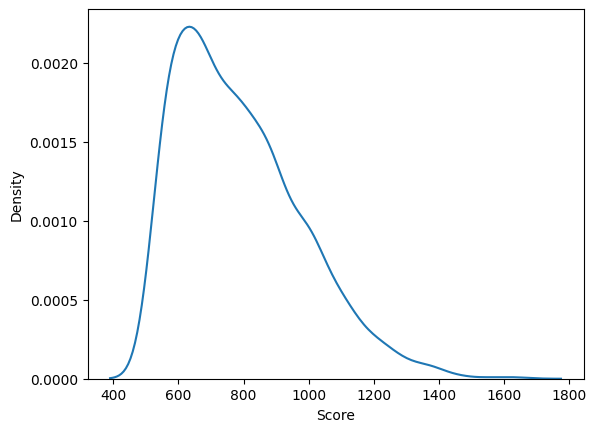

In [48]:
sns.kdeplot(df["Score"])
plt.show()
